In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import PyWGCNA

In [2]:
txl_mouse = pd.read_table('results/mouse_RPF_counts_norm_cds_ncorf.tsv')
txl_mouse

,3T3,Adult neural stem cell,Beige adipose tissue,Blastocyst,BMDC,Brain,Brown adipose tissue,CD4 T cell,Cerebellum,Embroid bodies,...,Spleen resting state B cell,Spleen resting state T cell,T-ALL,Testes,Type B Spermatogonial cell,White adipose tissue,Zygote,uid,len,gtype
0,272.271390,411.026669,1021.706818,115.698597,454.064447,1436.288767,1622.546353,184.830581,1766.668639,172.703594,...,908.413258,579.980401,50.546298,411.986938,124.144669,1245.078292,1039.764439,ENSMUSG00000051285,5232,CDS
1,0.000000,0.632349,6.730611,0.000000,0.000000,528.283002,1.271920,0.000000,1220.148805,0.000000,...,0.000000,0.000000,0.000000,0.466576,0.000000,1.188430,547.983961,ENSMUSG00000026312,3390,CDS
2,907.571299,773.678660,56.537136,971.868215,169.415127,52.874750,90.730316,487.574505,5.440469,889.918518,...,143.433672,131.813727,947.743097,336.712616,640.586491,17.034161,295.068287,ENSMUSG00000039748,7796,CDS
3,0.000000,0.000000,0.000000,763.610740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.829469,0.000000,0.000000,1517.494045,ENSMUSG00000104158,1789,CDS
4,949.924626,874.538281,732.290526,624.772424,551.688303,537.495441,416.341918,602.740040,539.595600,460.909591,...,0.000000,316.352946,227.458343,811.428156,690.244359,585.103607,407.475253,ENSMUSG00000057363,4620,CDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161636,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.784453,0.000000,0.000000,0.000000,15_12321117_12321091_-,27,ncORF
39420,0.000000,0.000000,0.000000,0.000000,0.061360,0.077415,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.894962,0.000000,0.000000,0.000000,2_68410854_68408984_-,93,ncORF
39421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423973,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.006826,0.000000,0.000000,0.000000,7_141119925_141120011_+,87,ncORF
39422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.012297,0.000000,0.000000,0.000000,16_16532785_16528785_-,78,ncORF


In [3]:
cnts = txl_mouse.drop(columns=['uid', 'len', 'gtype'])
print((cnts > 10).sum(axis=1).value_counts().sort_index())
good_genes = (cnts > 10).sum(axis=1) > cnts.shape[1]/2
print(good_genes.value_counts())

txl_mouse = txl_mouse[good_genes]
print(txl_mouse.shape)

0     2952
1     2765
2     1702
3     1397
4     1088
5      950
6      894
7      804
8      761
9      702
10     653
11     630
12     599
13     526
14     505
15     494
16     516
17     460
18     452
19     456
20     452
21     425
22     415
23     447
24     455
25     428
26     439
27     447
28     450
29     488
30     505
31     474
32     540
33     555
34     574
35     626
36     680
37     653
38     782
39     864
40    1181
41    1794
42    6444
Name: count, dtype: int64
False    20183
True     19241
Name: count, dtype: int64
(19241, 45)


In [4]:
adata = ad.AnnData(txl_mouse.drop(columns=['uid', 'len', 'gtype']).to_numpy().T)
adata.obs['tissue'] = txl_mouse.columns.difference(['uid', 'gtype', 'len']).to_list()
adata.var[['gtype', 'len']] = txl_mouse[['gtype', 'len']]
adata.var_names = txl_mouse['uid']
adata

AnnData object with n_obs × n_vars = 42 × 19241
    obs: 'tissue'
    var: 'gtype', 'len'

In [5]:
wdata = PyWGCNA.WGCNA(name='wgcna_ncorf_cds_mouse', anndata=adata, outputPath='./tmp/')
wdata.geneExpr.to_df().head(5)

uid,ENSMUSG00000051285,ENSMUSG00000039748,ENSMUSG00000057363,ENSMUSG00000047216,ENSMUSG00000038702,ENSMUSG00000033021,ENSMUSG00000078184,ENSMUSG00000061024,ENSMUSG00000026374,ENSMUSG00000026377,...,15_79416122_79415832_-,19_4675621_4675100_-,11_31820903_31821175_+,3_95190672_95190421_-,14_24540881_24541830_+,16_16965663_16965842_+,18_4379607_4380696_+,19_21630674_21630799_+,17_69382980_69514917_+,17_35219254_35219216_-
0,272.271390,907.571299,949.924626,0.000000,211.766636,653.451335,54.454278,738.157990,2129.767314,2341.533951,...,538.492304,90.757130,18.151426,0.000000,102.858081,0.000000,169.413309,30.252377,6.050475,6.050475
1,411.026669,773.678660,874.538281,106.866934,164.726842,599.150413,19.602810,1414.880263,3070.053040,2487.659868,...,872.325060,169.785632,285.821622,60.389303,86.315600,3.794092,135.954975,280.762832,25.610123,54.698164
2,1021.706818,56.537136,732.290526,40.383669,2409.558899,1356.891268,21.537957,476.527291,1908.801407,888.440711,...,468.450557,99.613049,22.884079,16.153467,30.960813,28.268568,84.805704,13.461223,115.766517,5.384489
3,115.698597,971.868215,624.772424,0.000000,0.000000,231.397194,23.139719,1851.177553,1735.478956,1666.059797,...,393.375230,161.978036,69.419158,0.000000,185.117755,0.000000,578.492985,69.419158,0.000000,0.000000
4,454.064447,169.415127,551.688303,0.000000,120.817959,996.119220,26.814346,647.348637,1720.106572,796.699024,...,482.596875,116.829555,442.712835,10.124410,36.079715,25.648505,124.254122,29.882349,5.645126,175.305692


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



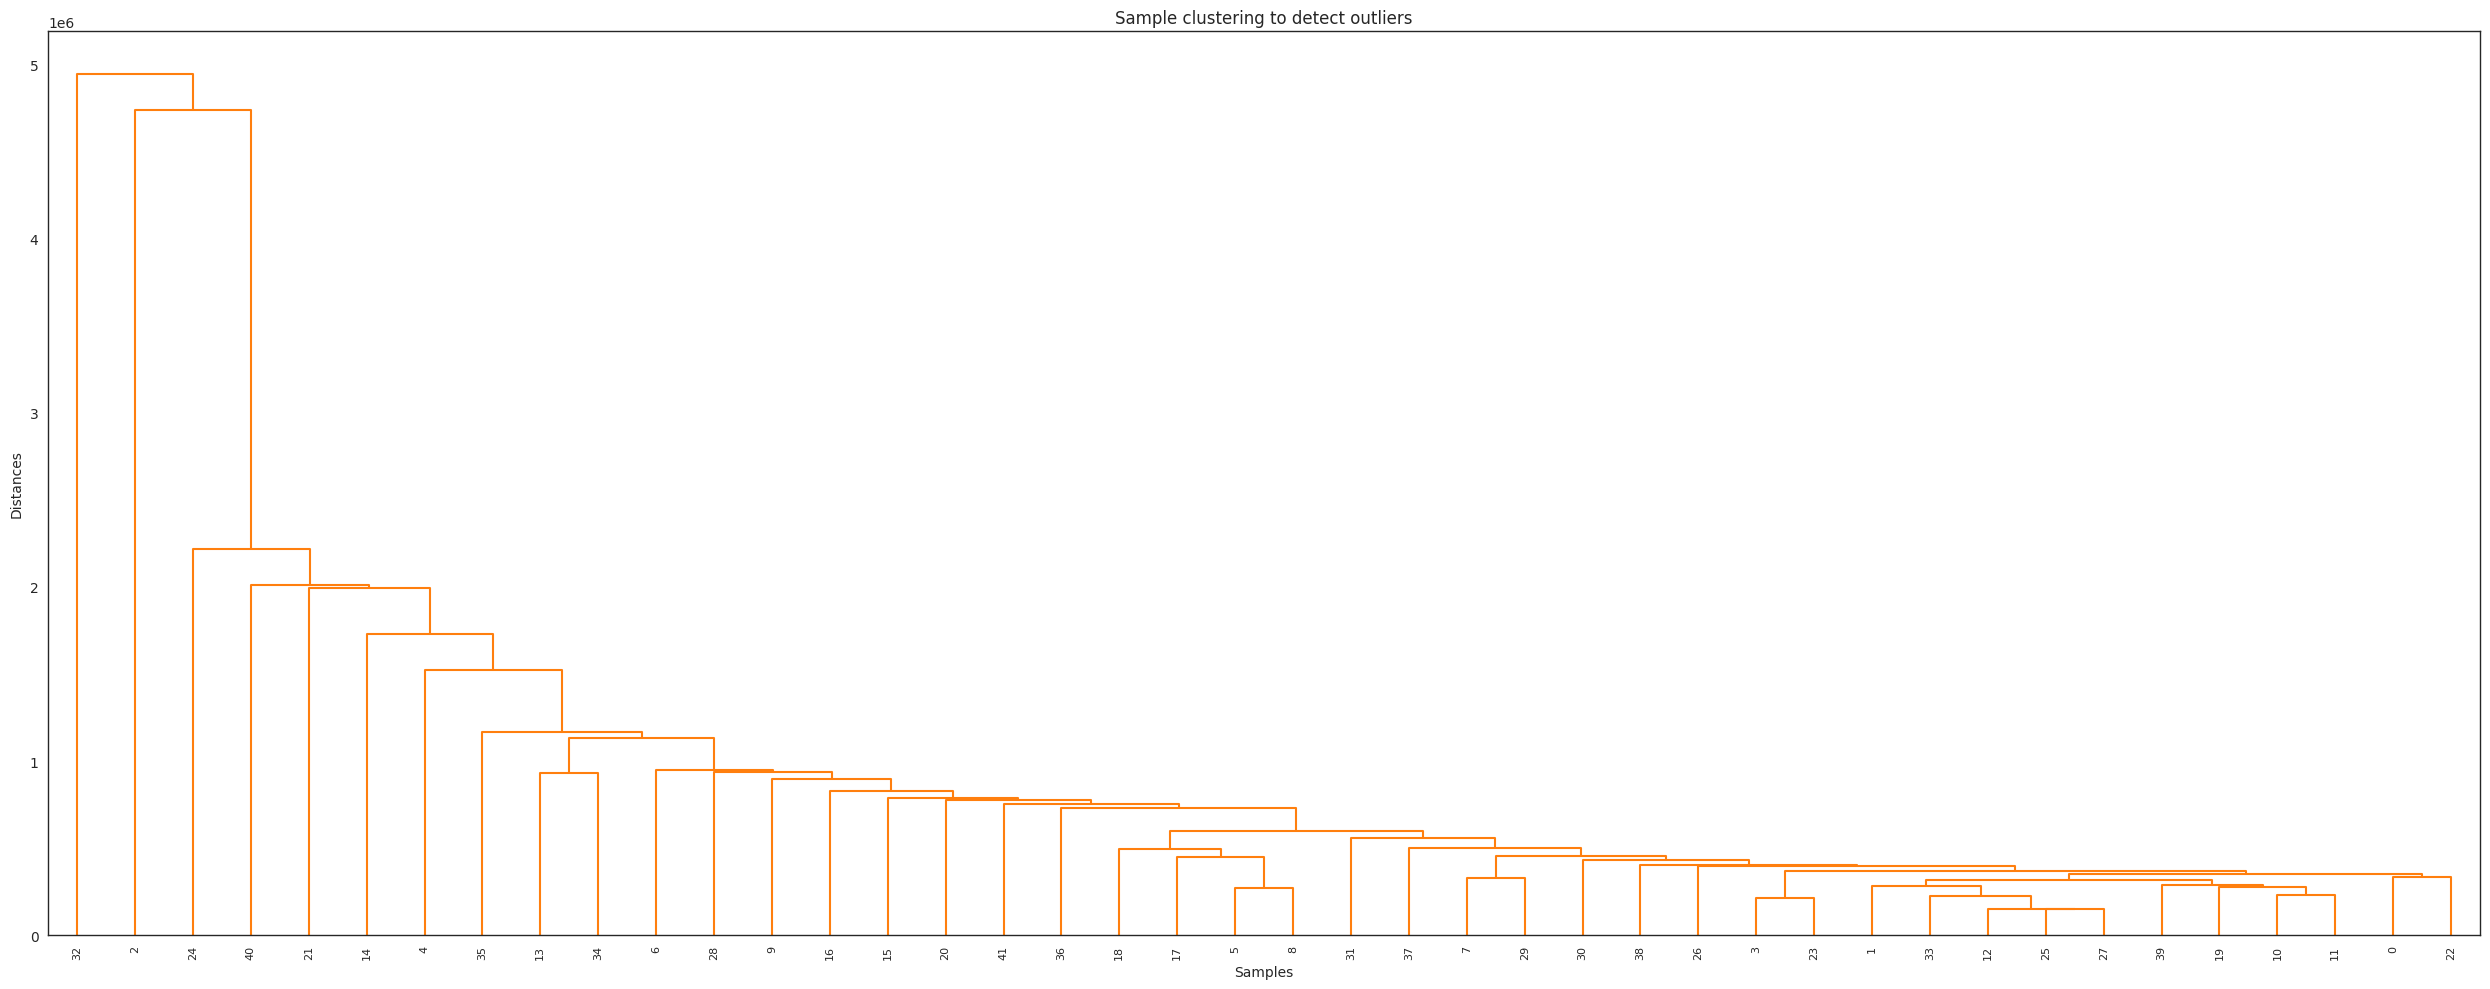

In [6]:
wdata.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2325
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.127018  1.021626       0.918057  1848.755393  1842.059794   
1       2  0.166835  -0.71763        0.93559   682.134386   630.217591   
2       3  0.679701 -1.301651       0.922615   330.109944   281.533453   
3       4  0.880482 -1.465597       0.951774    188.27631   143.910004   
4       5  0.939432    -1.549       0.973011   119.779368    79.846111   
5       6  0.952554 -1.587581       0.983202    82.302842    47.393397   
6       7  0.958232 -1.591641       0.988347    59.846088    29.344314   
7       8   0.95612 -1.594963       0.989855    45.429543    18.887925   
8       9  0.959012 -1.575477         0.9933    35.663493    12.659344   
9      10  0.959163 -1.562043       0.997347    28.757702     8.709667   
10     11  0.956373 -1.554406       0.995912    23.700896     6.065118   
11     13

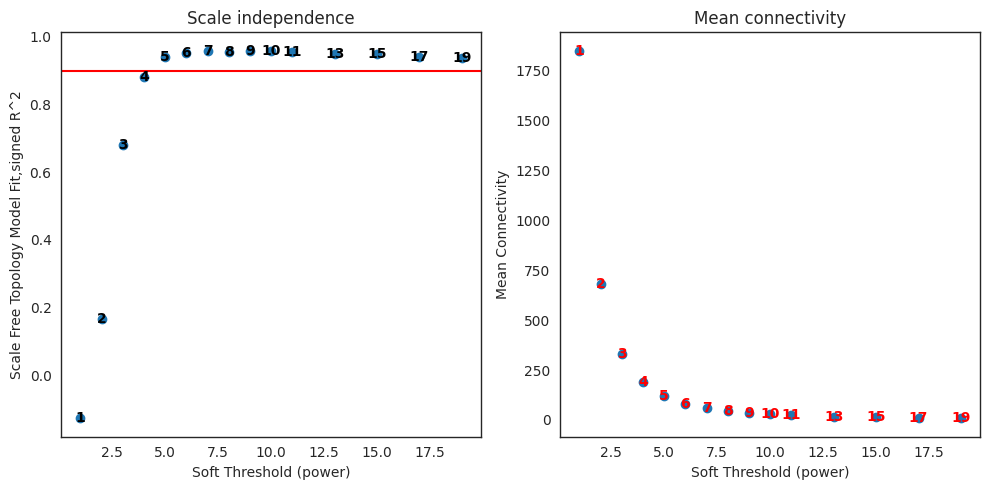

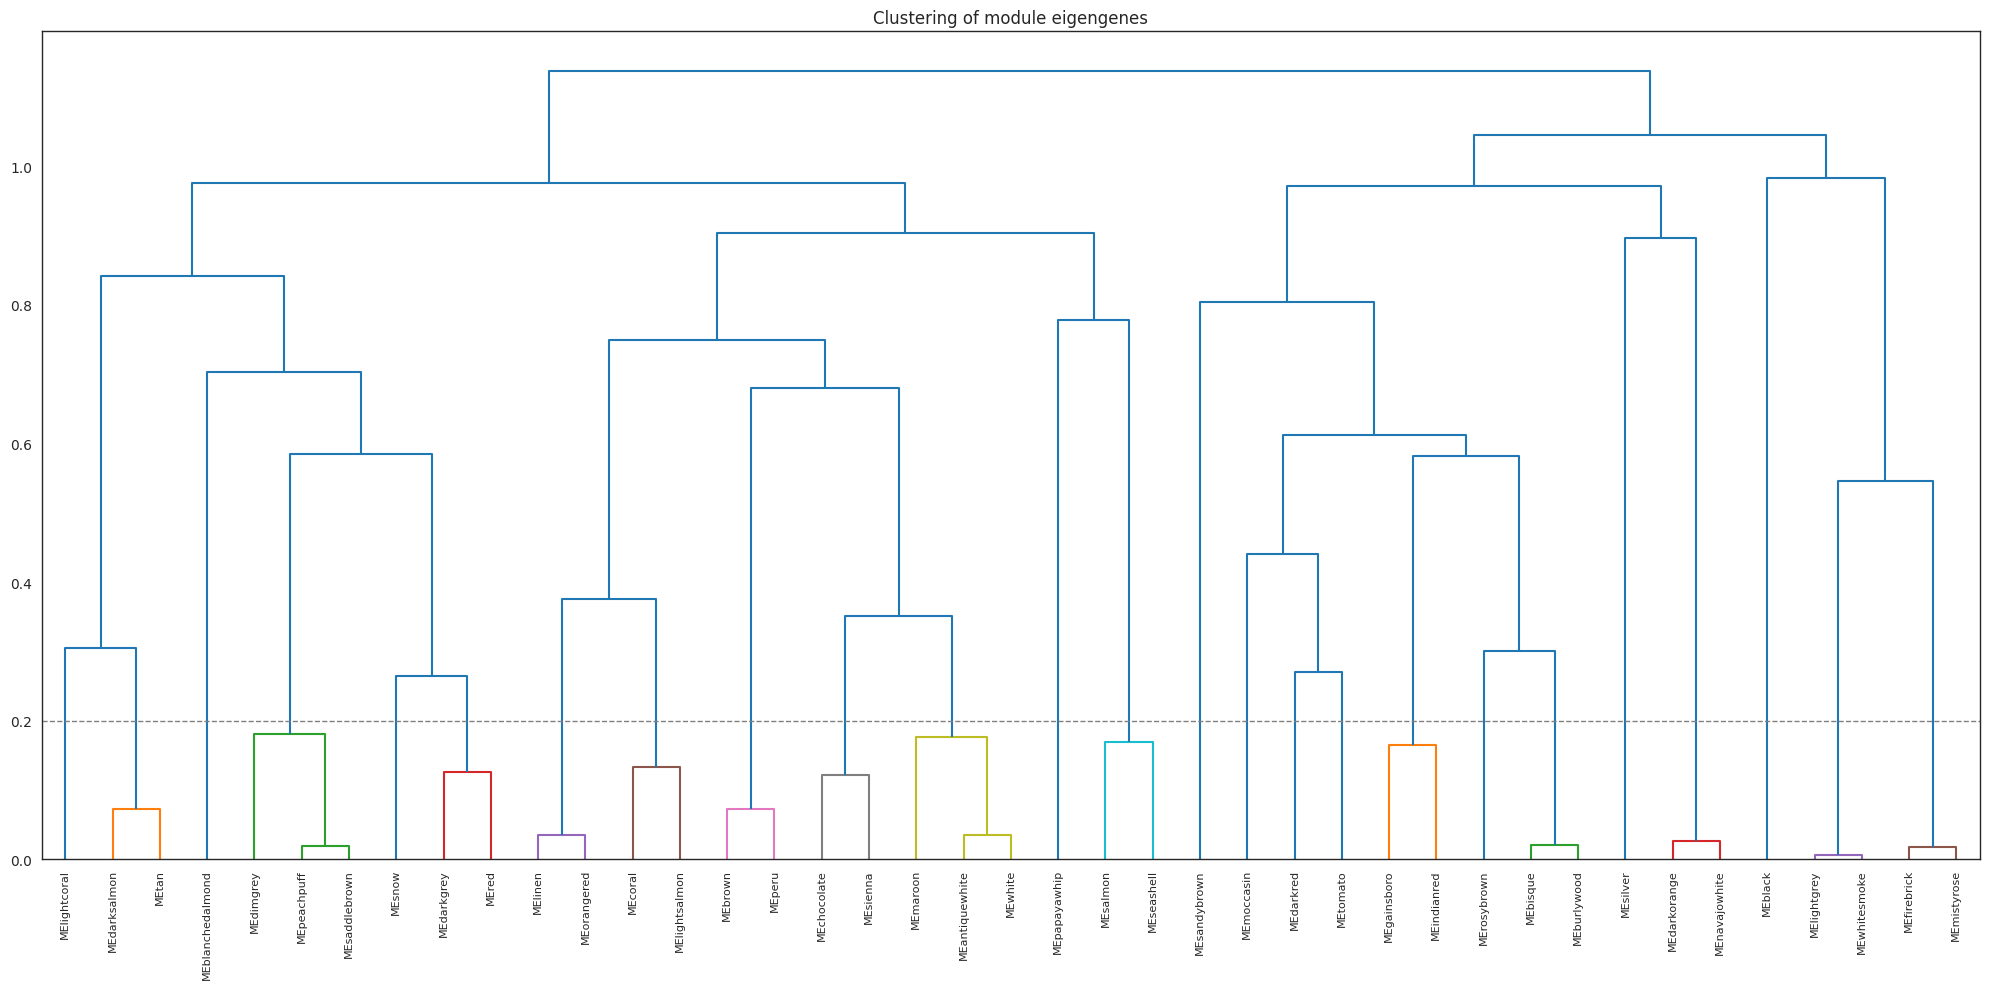

In [7]:
wdata.findModules()

In [8]:
wdata.saveWGCNA()

Saving WGCNA as wgcna_ncorf_cds_mouse.p


In [9]:
wdata.sft

,Power,SFT.R.sq,slope,truncated R.sq,mean(k),median(k),max(k)
0,1,0.127018,1.021626,0.918057,1848.755393,1842.059794,3087.847126
1,2,0.166835,-0.71763,0.93559,682.134386,630.217591,1601.589341
2,3,0.679701,-1.301651,0.922615,330.109944,281.533453,1065.82208
3,4,0.880482,-1.465597,0.951774,188.27631,143.910004,790.344679
4,5,0.939432,-1.549,0.973011,119.779368,79.846111,637.268034
5,6,0.952554,-1.587581,0.983202,82.302842,47.393397,544.734441
6,7,0.958232,-1.591641,0.988347,59.846088,29.344314,476.300972
7,8,0.95612,-1.594963,0.989855,45.429543,18.887925,423.309878
8,9,0.959012,-1.575477,0.9933,35.663493,12.659344,380.869365
9,10,0.959163,-1.562043,0.997347,28.757702,8.709667,346.227706


In [10]:
wdata.TOMType

'signed'

In [11]:
wdata.TOM

uid,ENSMUSG00000051285,ENSMUSG00000039748,ENSMUSG00000057363,ENSMUSG00000047216,ENSMUSG00000038702,ENSMUSG00000033021,ENSMUSG00000078184,ENSMUSG00000061024,ENSMUSG00000026374,ENSMUSG00000026377,...,15_79416122_79415832_-,19_4675621_4675100_-,11_31820903_31821175_+,3_95190672_95190421_-,14_24540881_24541830_+,16_16965663_16965842_+,18_4379607_4380696_+,19_21630674_21630799_+,17_69382980_69514917_+,17_35219254_35219216_-
uid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000051285,1.000000e+00,1.577424e-08,0.001222,0.008848,1.189397e-03,1.995941e-02,0.000004,1.142836e-07,0.000256,1.356461e-07,...,0.000488,0.000025,0.000128,0.000492,0.000007,0.000008,0.000021,5.003609e-05,0.010974,0.000095
ENSMUSG00000039748,1.577424e-08,1.000000e+00,0.001846,0.000009,1.979083e-07,6.287695e-08,0.032909,3.559667e-02,0.002628,7.171020e-02,...,0.000093,0.006082,0.001302,0.000031,0.003321,0.007606,0.013303,5.705201e-04,0.000001,0.000040
ENSMUSG00000057363,1.222118e-03,1.846241e-03,1.000000,0.004660,5.441409e-04,1.089482e-04,0.000032,4.681328e-06,0.000187,6.668218e-05,...,0.000003,0.000050,0.006066,0.000032,0.000067,0.000005,0.037393,1.957611e-04,0.015273,0.000035
ENSMUSG00000047216,8.847671e-03,8.986751e-06,0.004660,1.000000,5.915921e-04,3.969062e-04,0.000002,2.963823e-07,0.000257,3.091217e-07,...,0.000491,0.000009,0.000313,0.000663,0.000008,0.000035,0.001020,7.516108e-05,0.055005,0.000038
ENSMUSG00000038702,1.189397e-03,1.979083e-07,0.000544,0.000592,1.000000e+00,5.863541e-02,0.000003,3.338289e-06,0.000058,2.611339e-07,...,0.000157,0.000065,0.000003,0.000120,0.000003,0.000018,0.000010,9.167653e-07,0.001049,0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16_16965663_16965842_+,7.697653e-06,7.606371e-03,0.000005,0.000035,1.811866e-05,8.800644e-06,0.000546,1.291191e-02,0.000403,1.997050e-03,...,0.000768,0.001502,0.000006,0.000060,0.002736,1.000000,0.000013,2.049872e-04,0.000401,0.000178
18_4379607_4380696_+,2.125441e-05,1.330321e-02,0.037393,0.001020,1.049095e-05,1.808347e-06,0.001611,5.393766e-04,0.000024,1.998723e-03,...,0.000005,0.000186,0.029809,0.000030,0.001205,0.000013,1.000000,1.569727e-03,0.000036,0.000020
19_21630674_21630799_+,5.003609e-05,5.705201e-04,0.000196,0.000075,9.167653e-07,4.270652e-06,0.000134,6.140337e-04,0.000365,2.391917e-04,...,0.000204,0.000293,0.019594,0.007326,0.002479,0.000205,0.001570,1.000000e+00,0.000137,0.000233


In [12]:
wdata.datExpr.var.head()

,gtype,len,dynamicColors,moduleColors,moduleLabels
uid,,,,,
ENSMUSG00000051285,NaN,NaN,gainsboro,gainsboro,12
ENSMUSG00000039748,NaN,NaN,tomato,tomato,23
ENSMUSG00000057363,NaN,NaN,darkgrey,darkgrey,6
ENSMUSG00000047216,NaN,NaN,lightgrey,lightgrey,14
ENSMUSG00000038702,NaN,NaN,tomato,tomato,23


In [13]:
# check equal arrangement
print((wdata.TOM.index == wdata.adjacency.index).all(),
      (wdata.TOM.columns == wdata.adjacency.columns).all())
# get correlation, adjacency, and TOM
tom = wdata.TOM.melt(ignore_index=False, var_name='uid2', value_name='tom').reset_index(names='uid1')
adjacency = wdata.adjacency.melt(ignore_index=False, var_name='uid2', value_name='adjacency').reset_index(names='uid1')
tom['adjacency'] = adjacency['adjacency']
del adjacency

True True


In [14]:
results = tom[(tom.tom > 0.1) | (tom.adjacency > 0.1)]
results.shape

(9198755, 4)

In [15]:
results.to_csv('results/mouse_wgcna_ncorf_cds_adjacency_tom.tsv', sep='\t', index=False)

In [16]:
modules = wdata.datExpr.var.copy()
modules.drop(columns=['gtype', 'len'], inplace=True)
modules.reset_index(inplace=True)
modules.to_csv('results/mouse_wgcna_ncorf_cds_modules.tsv', sep='\t', index=False)

In [17]:
del wdata, tom